# Study of data reuse: Cholinergic interneurons in the striatum - Single cell patch clamp recordings (v1)

In this notebook we will look more closely at the EBRAINS dataset "[Cholinergic interneurons in the striatum - Single cell patch clamp recordings (v1)](https://search.kg.ebrains.eu/instances/f25ec9c9-2348-4a62-a6af-907d389f263d)", contributed by Sten Grillner from the Department of Department of Neuroscience, Karolinska Institutet, Stockholm.

As we can see from the dataset description,

The study entails the collection of single cell patch-clamp recordings, done in conjunction with morphological reconstructions, from cholinergic interneurons in the striatum.
More information is available in the [Data Descriptor](https://search.kg.ebrains.eu/instances/f25ec9c9-2348-4a62-a6af-907d389f263d).

This dataset forms part of the results reported in Hjorth JJJ, Kozlov A, Carannante I, Frost Nylén J, Lindroos R, Johansson Y, Tokarska A, Dorst MC, Suryanarayana SM, Silberberg G, Hellgren Kotaleski J, Grillner S. The microcircuits of striatum in silico. *Proc Natl Acad Sci U S A*. 2020 Apr 28;**117**(17):9554-9565. https://doi.org/10.1073/pnas.2000671117

In this notebook we will demonstrate how to access the data files and the metadata from this study, and how these data can be analysed and visualised, with the goal of reproducing some of the figures from the article.

### Notes: 

From the publication we ought to have current, voltage, somatic distance values
However, no idea how to find these in the .mat files: 

From the data descriptor:
DATA REGISTRY:
./*DataDescriptor.txt: This file.
./*DataDescriptor.md: This file in markdown format.
./*Spatial*.xlsx: Spatial data registration explained.
./sbj*/cell*/original/*.pxp: Original single cell recordings in Igor Pro packed format (PXP).
./sbj*/cell*/derived/*.mat: Selected traces in Matlab format.
./sbj*/cell*/original/*.tif: Slice overview.
./sbj*/cell*/original/*.DAT: Spatial data registration overlay.
./sbj*/cell*/original/*.xml: Spatial data specification file.

So not very useful


for pxp files managed to open with neo but not able to create graphs

In [22]:
#prepare notebook
!pip install scipy
import scipy.io
import numpy as np
!pip install h5py
import h5py
!pip install pymatreader
from pymatreader import read_mat
!pip install pandas
import pandas as pd
from scipy.io import loadmat
import mat73
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip install openpyxl
import openpyxl
import numpy as np
from statistics import mean
from matplotlib import style
import scipy.stats as stats
from openpyxl import Workbook
from openpyxl.chart import (
    ScatterChart,
    Reference,
    Series,
)
import matplotlib.mlab as mlab
#notebook preparation
import neo
import matplotlib.pyplot as plt
from neo import get_io
from neo import io

In [2]:
#presentation of the data
data=scipy.io.loadmat('hbp-00940-ephy-ChIN-STR/sbj1-160504/cell1_2/derived/hbp-00940_ephy-ChIN-STR_sbj1-160504_cell1-2_derived__md_20160504_cell_1_2_ChIN.mat')
print(data)

/home/isaurebotherel/.local/lib/python3.8/site-packages/scipy/io/matlab/_mio.py:226: MatReadWarning: Duplicate variable name "offset" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


{'__header__': b'MATLAB matrix file, generated by Malcolm McLean', '__version__': '1.0', '__globals__': ['Bridge_Bridge_ch0_469', 'Bridge_Bridge_ch1_469', 'Bridge_Bridge_ch2_469', 'Bridge_Bridge_ch3_469', 'Bridge_Bridge_ch4_469', 'Bridge_Bridge_ch5_469', 'Bridge_Bridge_ch6_469', 'Bridge_Bridge_ch7_469', 'Bridge_Bridge_ch0_470', 'Bridge_Bridge_ch1_470', 'Bridge_Bridge_ch2_470', 'Bridge_Bridge_ch3_470', 'Bridge_Bridge_ch4_470', 'Bridge_Bridge_ch5_470', 'Bridge_Bridge_ch6_470', 'Bridge_Bridge_ch7_470', 'Bridge_Bridge_ch0_471', 'Bridge_Bridge_ch1_471', 'Bridge_Bridge_ch2_471', 'Bridge_Bridge_ch3_471', 'Bridge_Bridge_ch4_471', 'Bridge_Bridge_ch5_471', 'Bridge_Bridge_ch6_471', 'Bridge_Bridge_ch7_471', 'Bridge_Bridge_ch5_472', 'Bridge_Bridge_ch5_473', 'Bridge_Bridge_ch5_474', 'Bridge_Bridge_ch5_475', 'Bridge_Bridge_ch5_476', 'Bridge_Bridge_ch5_477', 'Bridge_Bridge_ch5_478', 'Bridge_Bridge_ch5_479', 'Bridge_Bridge_ch5_480', 'Bridge_Bridge_ch5_481', 'Bridge_Bridge_ch5_482', 'Bridge_Bridge_ch5_4

In [13]:
#presentation of the data
data=scipy.io.loadmat('hbp-00940-ephy-ChIN-STR/sbj1-160504/cell3/derived/hbp-00940_ephy-ChIN-STR_sbj1-160504_cell3_derived__md_20160504_cell_3_ChIN.mat')
print(data)

{'__header__': b'MATLAB matrix file, generated by Malcolm McLean', '__version__': '1.0', '__globals__': ['Bridge_Bridge_ch5_469', 'Bridge_Bridge_ch5_470', 'Bridge_Bridge_ch5_471', 'Bridge_Bridge_ch5_472', 'Bridge_Bridge_ch5_473', 'Bridge_Bridge_ch5_474', 'Bridge_Bridge_ch5_475', 'Bridge_Bridge_ch5_476', 'Bridge_Bridge_ch5_477', 'Bridge_Bridge_ch5_478', 'Bridge_Bridge_ch5_479', 'Bridge_Bridge_ch5_480', 'Bridge_Bridge_ch5_481', 'Bridge_Bridge_ch5_482', 'Bridge_Bridge_ch5_483', 'Bridge_Bridge_ch5_484', 'Bridge_Bridge_ch5_485', 'Bridge_Bridge_ch5_486', 'Bridge_Bridge_ch5_487', 'Bridge_Bridge_ch5_488', 'Bridge_Bridge_ch5_489', 'Bridge_Bridge_ch5_490', 'Bridge_Bridge_ch5_491', 'Bridge_Bridge_ch5_492', 'Bridge_Bridge_ch5_493', 'Bridge_Bridge_ch5_494', 'Bridge_Bridge_ch5_495', 'Bridge_Bridge_ch5_496', 'Bridge_Bridge_ch5_497', 'Bridge_Bridge_ch5_498', 'Bridge_Bridge_ch5_499', 'Bridge_Bridge_ch5_500', 'Bridge_Bridge_ch5_501', 'Bridge_Bridge_ch5_502', 'Bridge_Bridge_ch5_503', 'Bridge_Bridge_ch5_5

In [20]:
data['stim27']

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [21]:
data['wstim0']

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],


In [14]:
data['Bridge_Bridge_ch5_470']

array([[-0.075975  ],
       [-0.07596875],
       [-0.07596875],
       [-0.07591875],
       [-0.076025  ],
       [-0.0758125 ],
       [-0.07595625],
       [-0.0759125 ],
       [-0.07596875],
       [-0.0759    ],
       [-0.07595625],
       [-0.07600625],
       [-0.07605625],
       [-0.07603125],
       [-0.07603125],
       [-0.07605625],
       [-0.07608125],
       [-0.076075  ],
       [-0.07601875],
       [-0.07610625],
       [-0.07585   ],
       [-0.075975  ],
       [-0.07605   ],
       [-0.0759875 ],
       [-0.07596875],
       [-0.07600625],
       [-0.07605   ],
       [-0.0761    ],
       [-0.0760625 ],
       [-0.07608125],
       [-0.07613125],
       [-0.0761375 ],
       [-0.076125  ],
       [-0.076125  ],
       [-0.0761875 ],
       [-0.07598125],
       [-0.07606875],
       [-0.076075  ],
       [-0.0760375 ],
       [-0.07595   ],
       [-0.076025  ],
       [-0.0760375 ],
       [-0.076075  ],
       [-0.0760625 ],
       [-0.07605   ],
       [-0

In [15]:
data['EC3_TesteCode_ch5_695']

array([[-0.07236875],
       [-0.07245   ],
       [-0.07244375],
       ...,
       [-0.0748    ],
       [-0.0749625 ],
       [-0.07493125]])

In [16]:
data['EC3_IV_ch5_701']

array([[-0.071675  ],
       [-0.07173125],
       [-0.07159375],
       ...,
       [-0.06874375],
       [-0.0687875 ],
       [-0.06880625]])

In [17]:
data['EC3_IDthresh_ch4_742']

array([[-2.97499997e-10],
       [-2.96874997e-10],
       [-2.97499997e-10],
       ...,
       [-2.96874997e-10],
       [-2.97499997e-10],
       [-2.96874997e-10]])

In [18]:
data['AP3AP_APdual_ch1_764']

array([[6.87499996e-05],
       [5.62499990e-05],
       [0.00000000e+00],
       ...,
       [8.12500002e-05],
       [6.87499996e-05],
       [5.62499990e-05]])

In [19]:
data['Puff_AirPuf_ch3_765']

array([[-0.00035625],
       [ 0.00011875],
       [-0.0003125 ],
       ...,
       [-0.000225  ],
       [ 0.00024375],
       [-0.00078125]])

### Fig 2c

Population behavior for models and experiment: voltage–current and frequency–current relations shown for four dSPNs optimized to corresponding data

In [12]:
open('hbp-00940-ephy-ChIN-STR/sbj3-170627/cell6/original/hbp-00940_ephy-ChIN-STR_sbj3-170627_cell6_original__md_20170524_cell_6_ChIN.pxp')

<_io.TextIOWrapper name='hbp-00940-ephy-ChIN-STR/sbj3-170627/cell6/original/hbp-00940_ephy-ChIN-STR_sbj3-170627_cell6_original__md_20170524_cell_6_ChIN.pxp' mode='r' encoding='UTF-8'>

In [23]:
#presentation of the data

reader = neo.io.ExampleIO("hbp-00940-ephy-ChIN-STR/sbj3-170627/cell6/original/hbp-00940_ephy-ChIN-STR_sbj3-170627_cell6_original__md_20170524_cell_6_ChIN.pxp")
block = reader.read(lazy=False)[0]  # get the first block
segment = block.segments[1]         # get data from first (and only) segment
signals = segment.analogsignals[1]  # get first (multichannel) signal

print(reader)
print(block)
print(segment)
print(signals)

ExampleIO: hbp-00940-ephy-ChIN-STR/sbj3-170627/cell6/original/hbp-00940_ephy-ChIN-STR_sbj3-170627_cell6_original__md_20170524_cell_6_ChIN.pxp
nb_block: 2
nb_segment:  [2, 3]
signal_streams: [stream 0 (chans: 8), stream 1 (chans: 8)]
signal_channels: [ch0, ch1, ch2, ch3 ... ch12 , ch13 , ch14 , ch15]
spike_channels: [unit0, unit1, unit2]
event_channels: [Some events, Some epochs]

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]] uV


TypeError: float() argument must be a string or a number, not 'Segment'

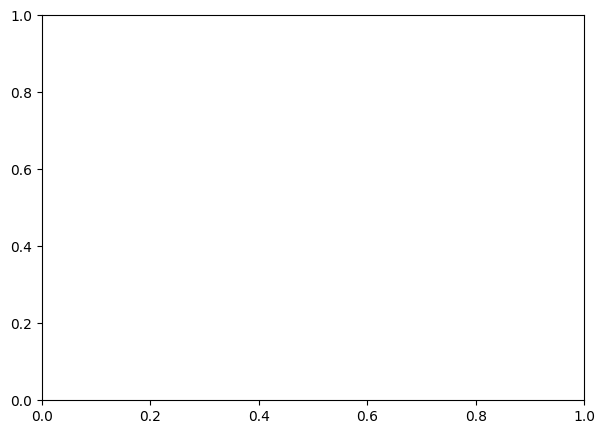

In [32]:
plt.plot(segment)

In [33]:
#visualisation of the data
plt.rcParams["figure.figsize"] = (7, 5)
file_path = "hbp-00940-ephy-ChIN-STR/sbj3-170627/cell6/original/hbp-00940_ephy-ChIN-STR_sbj3-170627_cell6_original__md_20170524_cell_6_ChIN.pxp"
reader = neo.io(file_path)
data = reader.read
reader = neo.io(file_path)
data = reader.read
seg0 = data[0].segments[0]
channel0 = seg0.analogsignals[0]
channel0 = channel0.load()
channel0.array_annotations = {}
plt.plot(channel0.times, channel0, label="segment #0, channel #0")
plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
plt.legend()
plt.title(f"{file_path}")

TypeError: 'module' object is not callable